In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-reco/tests/python_tools')

In [2]:
from NLLtreeoutReader import Reader

In [3]:
from Helix import Helix
from EventDisplay import EventDisplay
import matplotlib.pyplot as plt
from dg_wire import dg_wire

In [4]:
test_file = "/storage/gpfs_data/neutrino/users/gi/sand-reco/tests/test_reconstruct_NLLmethod_smear.root"

In [5]:
reader = Reader(test_file, "tReco")

In [6]:
my_helix_true = reader.get_true_helix(9)

In [7]:
wires = reader.get_wire_info(9)

In [8]:
all_wires = pd.read_csv("/storage/gpfs_data/neutrino/users/gi/sand-reco/wireinfo.txt")

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


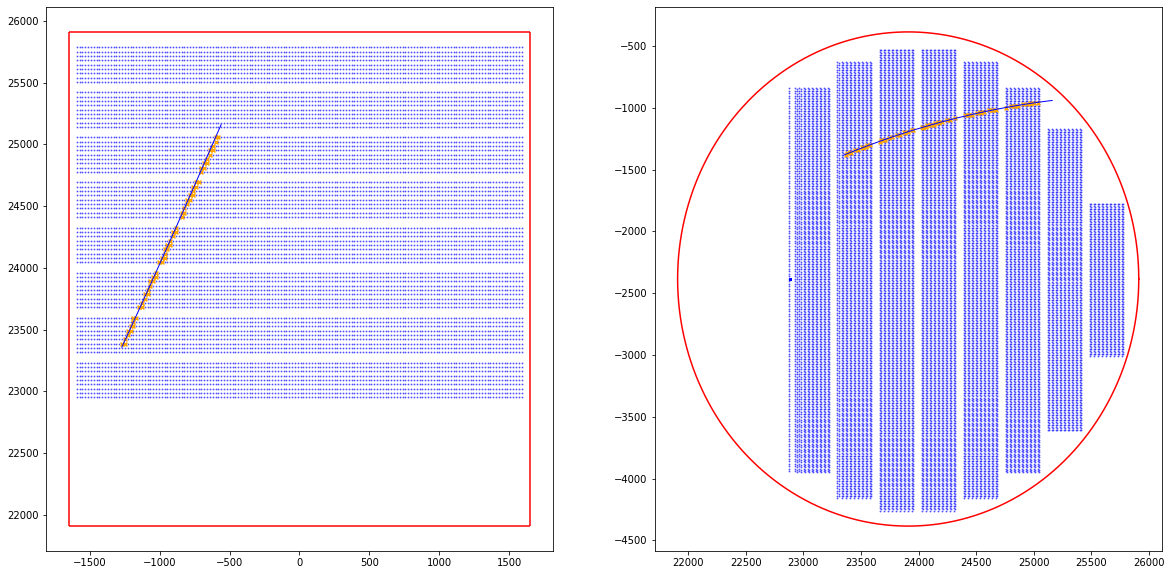

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display = EventDisplay(arg_file_name = test_file, 
                       arg_event_idx = 9, 
                       arg_true_helix_points = my_helix_true.get_helix_points(), 
                       ax_0 = ax[0], 
                       ax_1 = ax[1],
                       arg_fired_wires_info = wires)

display.plot_sand()
display.plot_true_helix()

display.plot_wires_from_csv_table(all_wires)
display.plot_wires(wires, color='orange', alpha=1)


<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


(-1500.0, -500.0)

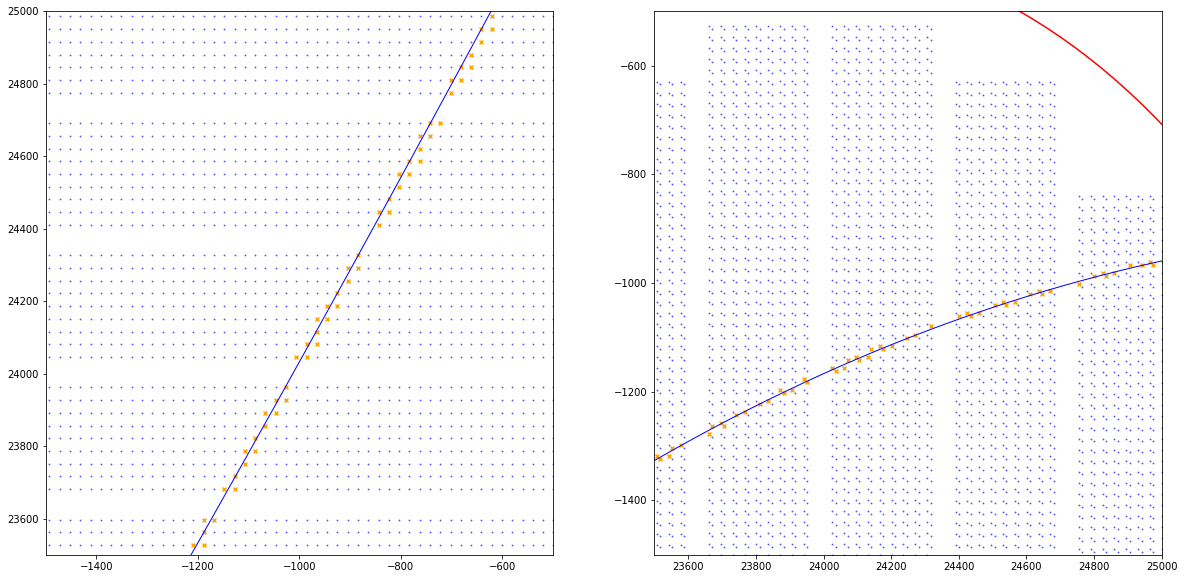

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display = EventDisplay(arg_file_name = test_file, 
                       arg_event_idx = 9, 
                       arg_true_helix_points = my_helix_true.get_helix_points(), 
                       ax_0 = ax[0], 
                       ax_1 = ax[1],
                       arg_fired_wires_info = wires)

display.plot_sand()
display.plot_true_helix()

display.plot_wires_from_csv_table(all_wires)
display.plot_wires(wires, color='orange', zoom_x_range=[-1500, -500],zoom_y_range=[-1500, -500],zoom_z_range=[23500,25000],alpha=1)

ax[0].set_xlim([-1500, -500])
ax[0].set_ylim([23500,25000])
ax[1].set_xlim([23500,25000])
ax[1].set_ylim([-1500, -500])